# NEU502B Homework 3: Drift-diffusion models
*Due March 20, 2024*

*Submission instructions:* First, rename your homework notebook to include your name (e.g. `homework-3-nastase.ipynb`); keep your homework notebook in the `homework` directory of your clone of the class repository. Prior to submitting, restart the kernel and run all cells (see *Kernel* > *Restart Kernel and Run All Cells...*) to make sure your code runs and the figures render properly. Only include cells with necessary code or answers; don't include extra cells used for troubleshooting. To submit, `git add`, `git commit`, and `git push` your homework to your fork of the class repository, then make a pull request on GitHub to sync your homework into the class repository.

The **drift-diffusion model** (DDM) has been a dominant model in understanding how decisions are made. The model predicts how one makes a decision by integrating evidence over time. Part of the power of the drift-diffusion model is how simple it is. The dynamics are captured by:
$$ dC = v \cdot dt + w \cdot \mathcal{N}(0,1) $$
Where $C$ is your decision variable, $v$ is the evidence that accumulates over time (the "drift"), and $w$ is the amount of noise in the integration (the "diffusion"). The initial condition is typically set to $C_0$ = 0 and the integration occurs to some bound $\pm B$, which initiates the choice. To get a better intuition for how the model works, let’s simulate a decision process using the drift-diffusion model.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Problem 1: Simulate a simple decision process
First, we'll simulate a simple two-alternative forced choice (2AFC) decision process using the drift-diffusion model. The following function takes in evidence $v$ and uses a `while` loop to continue updating the decision variable $C$ until it reaches either the positive or negative decision bound $\pm B$ (with random-normal noise scaled $w$ at each update). Make sure you understand what each line of the function is doing. We'll start with parameters $C_0$ = 0, $B$ = 1, $dt$ = 0.0005 ms, $v$ = 2.5, and $w$ = 0.05.

In [14]:
def ddm(C, v, dt, w, B):
    '''Simulate drift-diffusion model dynamics.

    Parameters
    ----------
    C : float
        Decision variable.
    v : float
        Drift rate.
    dt : float
        Time step (in ms).
    w : float
        Drift noise.
    B : float
        Decision bound.

    Returns
    -------
    C : float
        Decision variable at bound.
    z : float
        Reaction time (in ms)
    x : ndarray
        Accumulated evidence.
    '''

    # While decision variable C is within decision boundary,
    # update C according to the provided equation
    x = []
    while np.abs(C) < B:
        C = C + v * dt + w * np.random.randn()
        x.append(C)
    C = B if C > 0 else -B
    return C, len(x), np.array(x)

Try running 1000 simulations to get a good sense of how the model behaves. Keep the same parameters so that the only thing that differs across iterations is the noise. With positive evidence $v$ = 2.5, the "correct" choice is made when the model reaches the positive bound $B$ = 1; if the model reaches the negative bound, this indicates an "incorrect" choice. Plot the time series of accumulated evidence for several model runs (e.g. 10) to include both correct and incorrect trials. Plot model runs that terminate in a correct decision in one color, and model runs that terminate in an incorrect decision in another color. Why does the model occasionally make decision errors?

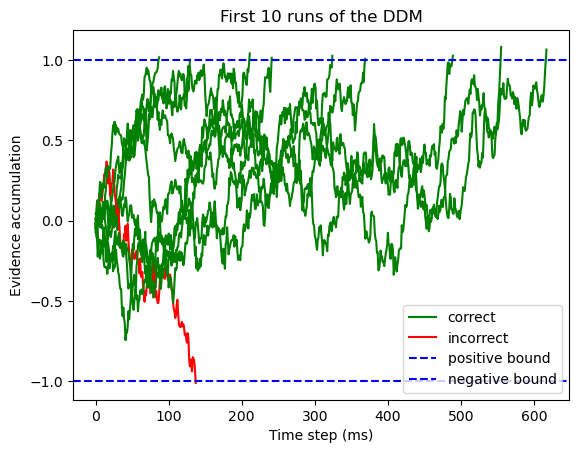

In [15]:
# Set a random seed
np.random.seed(1312)

# Set parameters
C0, v, dt, w, B = 0., 2.5, 5e-4, .05, 1.

# Loop through 1000 runs of the model:
results=[]
for i in range(1000):
    a= ddm(C0, v, dt, w, B)
    results.append(a)

# Plot first e.g. 10 model runs:
first_10_runs= results[:10]

for C, _, x in first_10_runs:
    if C > 0:
        plt.plot(x, color= "green", label= "correct")
    else:
        plt.plot(x, color= "red", label= "incorrect")

plt.axhline(y=1, color= "blue", label= "positive bound", linestyle= "--")
plt.axhline(y=-1, color= "blue", label= "negative bound", linestyle= "--")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("Time step (ms)")
plt.ylabel("Evidence accumulation")
plt.title('First 10 runs of the DDM')
plt.show()

#The model sometimes makes decision errors. One possible explanation is low drift rate. That is, if the drift rate is low, evidence accumulation slow making the decision process more susceptable to random noise, resulting in errors.

Plot the proportion of runs that ended in correct and incorrect choices (e.g. a simple bar plot).

Text(0.5, 1.0, 'Proportion of Correct vs Incorrect choices')

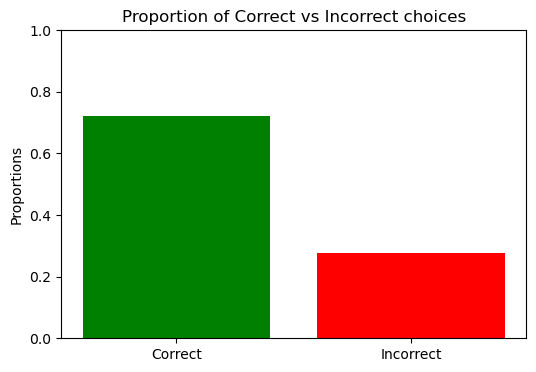

In [16]:
# Plot the proportion of correct and incorrect choices:
correct= []
incorrect= []
for C, _, x in results:
    if C > 0:
        correct.append(x)
    else:
        incorrect.append(x)


proportions= [len(correct)/len(results), len(incorrect)/len(results)]
labels = ['Correct', 'Incorrect']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, proportions, color=['green', 'red'])
plt.ylim(0,1)
plt.ylabel("Proportions")
plt.title("Proportion of Correct vs Incorrect choices")

Plot the two distributions of reaction times (RTs; e.g. using `sns.histplot` or `sns.kdeplot`) for correct and incorrect trials. (You may want to convert the reaction times and outcomes to a `pandas` `DataFrame` before plotting with `seaborn`.) Report the mean and median of these distributions. Are they symmetric or skewed?

<Axes: xlabel='Reaction time', ylabel='Density'>

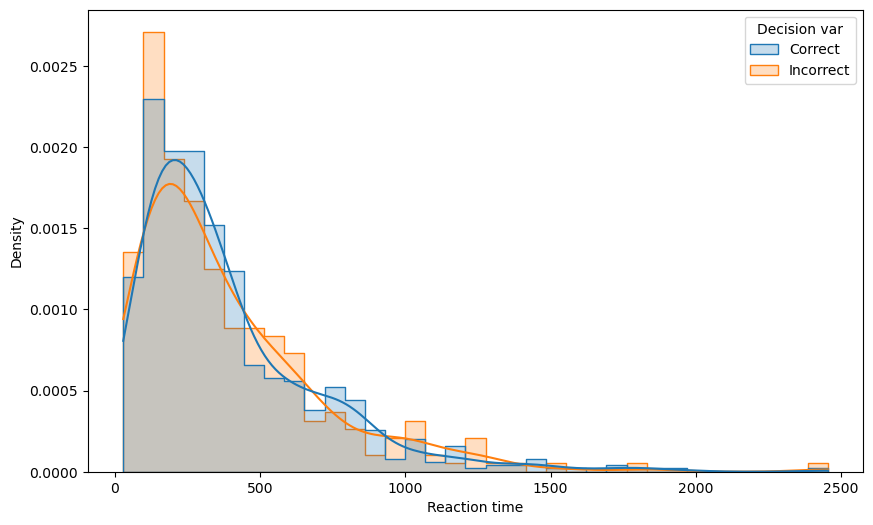

In [17]:
# Plot RT distributions of correct and incorrect trials:
df= pd.DataFrame(results, columns= ['Decision var', 'Reaction time', 'Acc Evidence'])
df['Decision var'] = np.where(df['Decision var'] > 0, 'Correct', 'Incorrect')

#Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Reaction time', hue='Decision var', element='step', stat='density', common_norm=False, kde=True)

#The distribution is Skewed.
    

In [18]:
from scipy.stats import skew

# Report the mean, median, and skew:
mean_rt_correct = df[df['Decision var'] == 'Correct']['Reaction time'].mean()
print(f'The mean reaction time for correct trials is {mean_rt_correct}')
mean_rt_incorrect = df[df['Decision var'] == 'Incorrect']['Reaction time'].mean()
print(f'The mean reaction time for incorrect trials is {mean_rt_incorrect}')
median_rt_correct = df[df['Decision var'] == 'Correct']['Reaction time'].median()
print(f'The median reaction time for correct trials is {median_rt_correct}')
median_rt_incorrect = df[df['Decision var'] == 'Incorrect']['Reaction time'].median()
print(f'The median reaction time for incorrect trials is {median_rt_incorrect}')
skew_rt_correct = skew(df[df['Decision var'] == 'Correct']['Reaction time'])
skew_rt_incorrect = skew(df[df['Decision var'] == 'Incorrect']['Reaction time'])

(skew_rt_correct, skew_rt_incorrect)



The mean reaction time for correct trials is 389.4135546334716
The mean reaction time for incorrect trials is 387.85920577617327
The median reaction time for correct trials is 297.0
The median reaction time for incorrect trials is 290.0


(1.960933799815592, 2.086342452550783)

### Problem 2: Varying sensory evidence
Now that we have a grasp on how the drift-diffusion model behaves, let's start varying the input. Start with the previous model with evidence $v$ = 2.5, then run two additional models with increased $2 \times v$ evidence and decreased $.5 \times v$ evidence. As in the previous exercises, plot a few model runs, the proportion of correct and incorrect trials, and the reaction time distributions for all three levels of sensory evidence (baseline, increased, and decreased). How do these different amounts of sensory evidence affect the decision process?

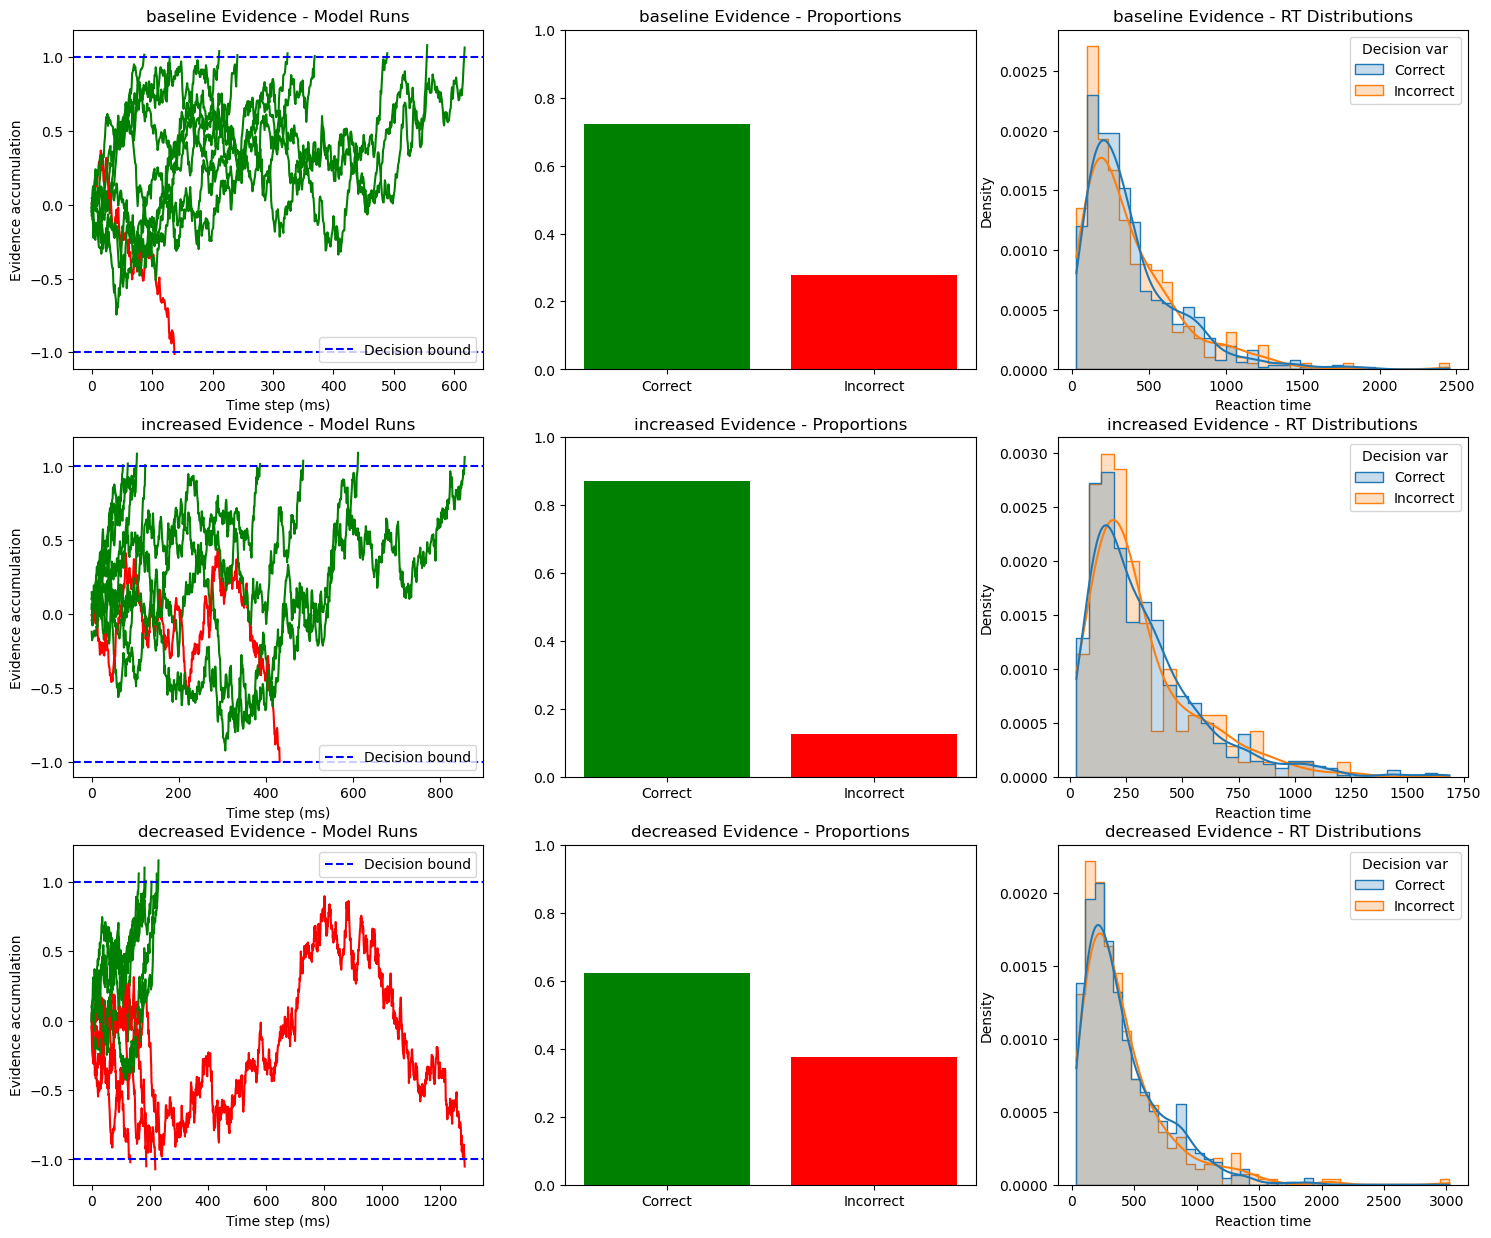

In [19]:
# Set a random seed
np.random.seed(1312)

# Set up different evidence levels
C0, dt, w, B = 0., 5e-4, .05, 1.
v_base = 2.5
vs = [v_base, v * 2, v * .5]
labels = ['baseline', 'increased', 'decreased']

all_results = {}
# Run models and plot for three evidence levels:
for v, label in zip(vs, labels):
    results = []
    for _ in range(1000):
        result = ddm(C0, v, dt, w, B)
        results.append(result)
    all_results[label] = results
    
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
for i, label in enumerate(labels):
    results = all_results[label]
    for j in range(10):
        C, _, x = results[j]
        color = 'green' if C > 0 else 'red'
        axs[i, 0].plot(x, color=color)
    axs[i, 0].set_title(f'{label} Evidence - Model Runs')
    axs[i, 0].set_xlabel('Time step (ms)')
    axs[i, 0].set_ylabel('Evidence accumulation')
    axs[i, 0].axhline(B, color='blue', linestyle='--', label= 'Decision bound')
    axs[i, 0].axhline(-B, color='blue', linestyle='--')
    axs[i, 0].legend()
    
    df = pd.DataFrame(results, columns=['Decision var', 'Reaction time', 'Acc Evidence'])
    df['Decision var'] = np.where(df['Decision var'] > 0, 'Correct', 'Incorrect')

    # Plot proportion of correct and incorrect choices
    correct_proportion = df['Decision var'].value_counts(normalize=True)['Correct']
    incorrect_proportion = 1 - correct_proportion
    axs[i, 1].bar(['Correct', 'Incorrect'], [correct_proportion, incorrect_proportion], color=['green', 'red'])
    axs[i, 1].set_title(f'{label} Evidence - Proportions')
    axs[i, 1].set_ylim(0, 1)

    # Plot reaction time distributions
    sns.histplot(data=df, x='Reaction time', hue='Decision var', element='step', stat='density', common_norm=False, kde=True, ax=axs[i, 2])
    axs[i, 2].set_title(f'{label} Evidence - RT Distributions')

#When the evidence is increased, the proportion of incorrect responses decreases as compared to the baseline evidence. The decision is faster in hitting the bound. On the contrary, when the evidence is decreased, the proportion of incorrect choices increases compared to baseline evidence and the decision process is slow.

### Problem 3: Speed-accuracy tradeoff
Subjects appear to be able to trade accuracy for speed in most perceptual decision-making tasks. The drift-diffusion model can capture this tradeoff in a relatively simple way. Describe how you might model this speed-accuracy tradeoff. Using a fixed sensory evidence $v$ = 2.5, run three different versions of the model: the baseline model from previous exercises, an "accuracy"-biased model, and a "speed"-biased model. As in the previous exercise, plot a few model runs, the proportion of correct and incorrect trials, and the reaction time distributions for all three models (baseline, accuracy, and speed).

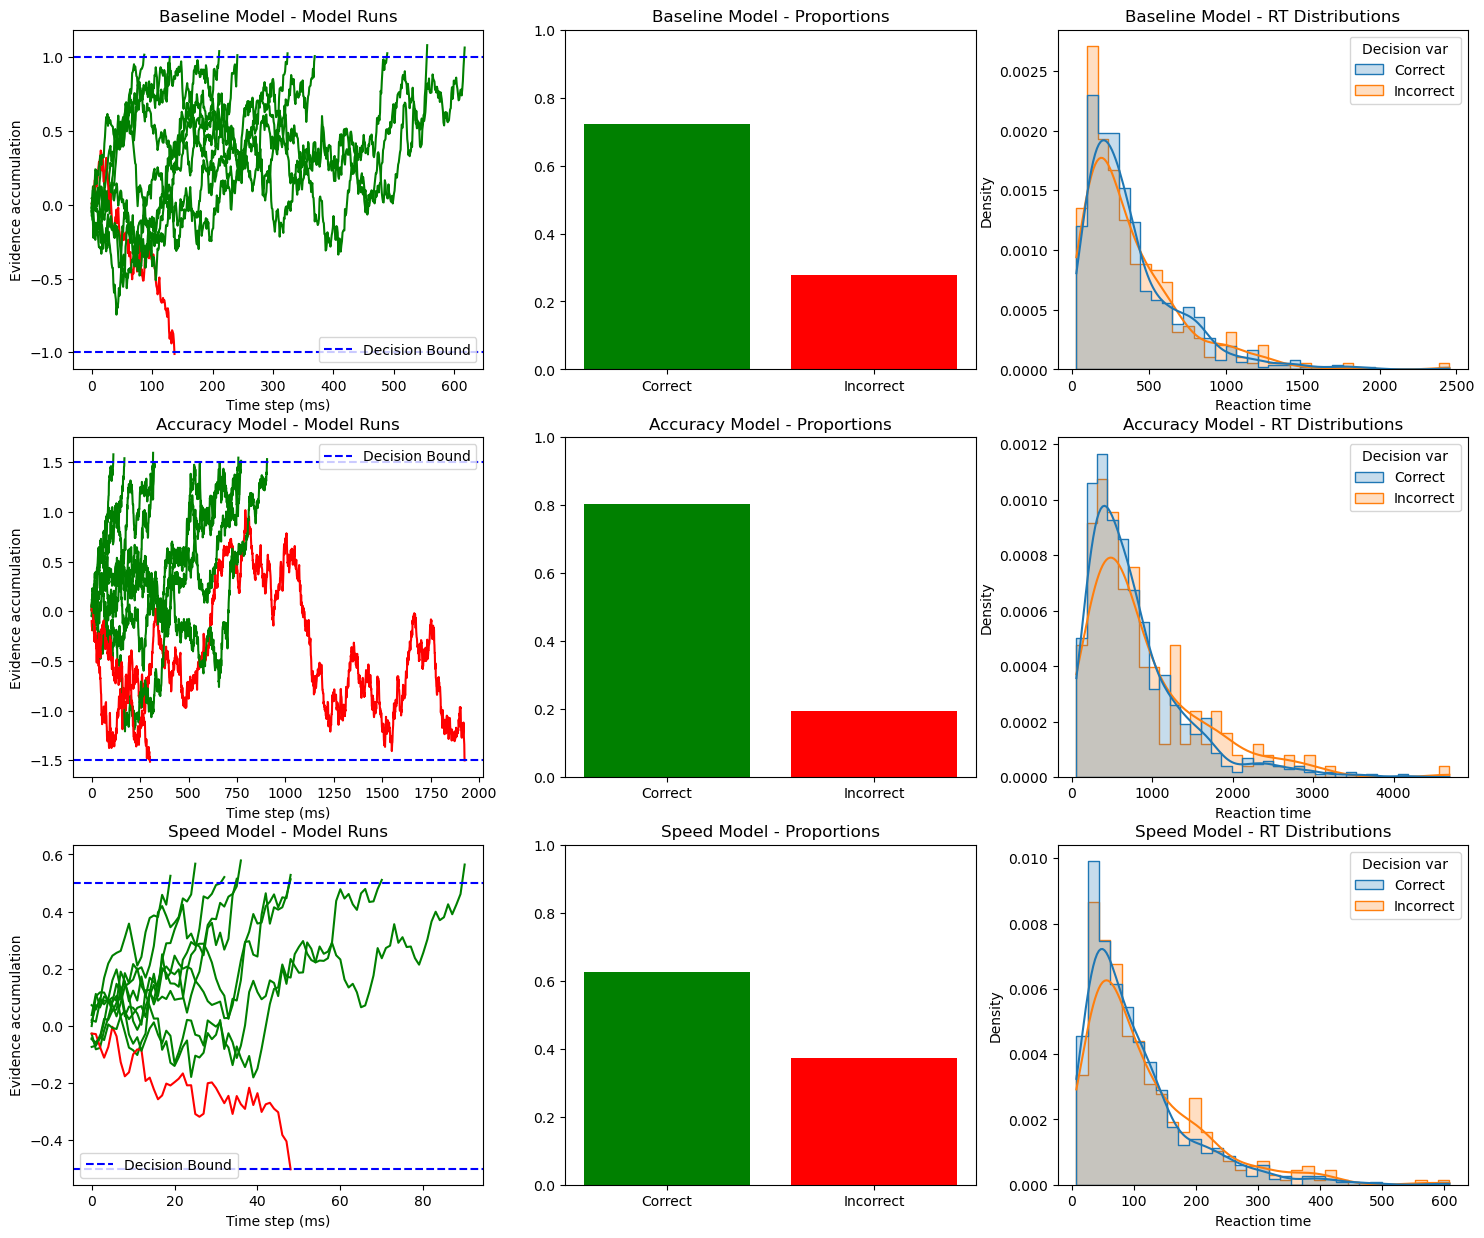

In [20]:
# Set a random seed
np.random.seed(1312)
v= 2.5

# Set up different models:
C0, dt, w, v_base = 0., 5e-4, .05, 2.5
#Can model this by changing decision bounds
B_baseline = 1.0  # Decision bound for the baseline model
B_accuracy = 1.5  # Increased decision bound for the accuracy-biased model
B_speed = 0.5     # Decreased decision bound for the speed-biased model
Bs = [B_baseline, B_accuracy, B_speed]
model_labels = ['Baseline', 'Accuracy', 'Speed']

# Run models and plot for three evidence levels:
model_results = {}
for B, label in zip(Bs, model_labels):
    results = []
    for _ in range(1000):
        result = ddm(C0, v_base, dt, w, B)
        results.append(result)
    model_results[label] = results

# Plot model runs, proportions, and RT distributions for each model
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

for i, label in enumerate(model_labels):
    results = model_results[label]

    # Plot a few model runs
    for j in range(10):
        C, _, x = results[j]
        color = 'green' if C > 0 else 'red'
        axs[i, 0].plot(x, color=color)
    axs[i, 0].set_title(f'{label} Model - Model Runs')
    axs[i, 0].set_xlabel('Time step (ms)')
    axs[i, 0].set_ylabel('Evidence accumulation')
    axs[i, 0].axhline(Bs[i], color='blue', linestyle='--', label='Decision Bound')
    axs[i, 0].axhline(-Bs[i], color='blue', linestyle='--')
    axs[i, 0].legend()


    df = pd.DataFrame(results, columns=['Decision var', 'Reaction time', 'Acc Evidence'])
    df['Decision var'] = np.where(df['Decision var'] > 0, 'Correct', 'Incorrect')

    
    sns.histplot(data=df, x='Reaction time', hue='Decision var', element='step', stat='density', common_norm=False, kde=True, ax=axs[i, 2])
    axs[i, 2].set_title(f'{label} Model - RT Distributions')

    
    correct_proportion = df['Decision var'].value_counts(normalize=True)['Correct']
    incorrect_proportion = 1 - correct_proportion
    axs[i, 1].bar(['Correct', 'Incorrect'], [correct_proportion, incorrect_proportion], color=['green', 'red'])
    axs[i, 1].set_title(f'{label} Model - Proportions')
    axs[i, 1].set_ylim(0, 1)





### Problem 4: Trial-by-trial sensory variability
In the original "baseline" model, we see that the reaction time distributions for correct and incorrect trials are largely overlapping. However, in experiments, reaction times for incorrect trials are typically longer than for correct trials. To capture this effect, let's add some trial-by-trial variability: instead of a fixed $v$ for all trials, allow $v$ to vary across trials according to a normal distribution $v = 2.5 + \mathcal{N}(0,5)$. Report the mean, median, and skew as in Problem 1.

(0.0, 1.0)

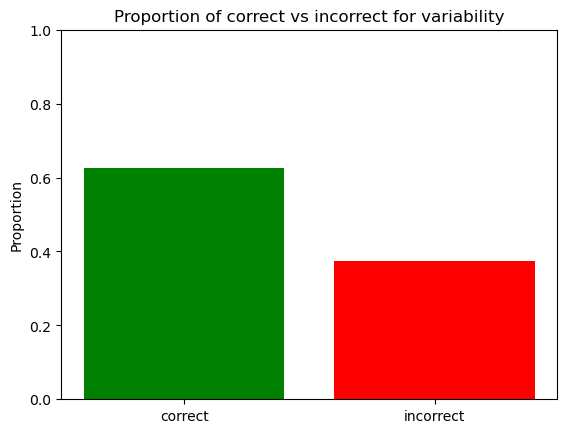

In [21]:
# Set a random seed
np.random.seed(1312)
v_mean= 2.5
v_sd= 5

# Run models with trial-by-trial variability:
variable_v_results = []
for _ in range(1000):
    v_trial = v_mean + np.random.normal(0, v_sd)  # Draw v for each trial from a normal distribution
    result = ddm(C0, v_trial, dt, w, B)
    variable_v_results.append(result)

# Plot RT distributions of correct and incorrect trials:
df_variable_v = pd.DataFrame(variable_v_results, columns=['Decision var', 'Reaction time', 'Acc Evidence'])
df_variable_v['Decision var'] = np.where(df_variable_v['Decision var'] > 0, 'Correct', 'Incorrect')
correct_proportion = df['Decision var'].value_counts(normalize=True)['Correct']
incorrect_proportion = 1 - correct_proportion
plt.bar(['correct','incorrect'], [correct_proportion, incorrect_proportion], color= ['green', 'red'])
plt.title("Proportion of correct vs incorrect for variability")
plt.ylabel("Proportion")
plt.ylim(0, 1)


In [22]:
# Report the mean, median, and skew:
mean_rt_correct = df_variable_v[df_variable_v['Decision var'] == 'Correct']['Reaction time'].mean()
print(f'The mean reaction time with variability for correct trials is {mean_rt_correct}')
mean_rt_incorrect = df_variable_v[df_variable_v['Decision var'] == 'Incorrect']['Reaction time'].mean()
print(f'The mean reaction time with variability for incorrect trials is {mean_rt_incorrect}')
median_rt_correct = df_variable_v[df_variable_v['Decision var'] == 'Correct']['Reaction time'].median()
print(f'The median reaction with variability time for correct trials is {median_rt_correct}')
median_rt_incorrect = df_variable_v[df_variable_v['Decision var'] == 'Incorrect']['Reaction time'].median()
print(f'The median reaction time with variability for incorrect trials is {median_rt_incorrect}')
skew_rt_correct = skew(df_variable_v[df_variable_v['Decision var'] == 'Correct']['Reaction time'])
skew_rt_incorrect = skew(df_variable_v[df_variable_v['Decision var'] == 'Incorrect']['Reaction time'])

(skew_rt_correct, skew_rt_incorrect)


The mean reaction time with variability for correct trials is 102.39074960127591
The mean reaction time with variability for incorrect trials is 104.84182305630027
The median reaction with variability time for correct trials is 79.0
The median reaction time with variability for incorrect trials is 79.0


(1.8231618379597172, 1.5480604597400462)